In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
va_filtered_listings_albemarle = pd.read_csv("va_filtered_listings_albemarle.csv")

# Display the first few rows
va_filtered_listings_albemarle.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city_x,state,...,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city_y,county
0,6/1/2022,8/31/2022,90,zip code,2,9054,f,Zip Code: 22932,NaN,Virginia,...,NaN,0.650000,-0.115957,0.650000,"Charlottesville, VA",16820,2/10/2025 14:21,22932,Yancey mills,Albemarle
1,6/1/2019,8/31/2019,90,zip code,2,9048,f,Zip Code: 22911,NaN,Virginia,...,NaN,0.012987,0.007369,0.006364,"Charlottesville, VA",16820,2/10/2025 14:21,22911,Zcta 22911,Albemarle
2,10/1/2024,12/31/2024,90,zip code,2,9054,f,Zip Code: 22932,NaN,Virginia,...,NaN,0.310345,0.000000,-0.097063,"Charlottesville, VA",16820,2/10/2025 14:21,22932,Yancey mills,Albemarle
3,3/1/2020,5/31/2020,90,zip code,2,9065,f,Zip Code: 22947,NaN,Virginia,...,NaN,0.000000,0.000000,0.000000,"Charlottesville, VA",16820,2/10/2025 14:21,22947,Boyd tavern,Albemarle
4,2/1/2018,4/30/2018,90,zip code,2,9841,f,Zip Code: 24590,NaN,Virginia,...,NaN,NaN,NaN,NaN,"Charlottesville, VA",16820,2/10/2025 14:21,24590,Scottsville,Albemarle


In [5]:
# Ensure 'period_begin' is a datetime object
va_filtered_listings_albemarle['period_begin'] = pd.to_datetime(va_filtered_listings_albemarle['period_begin'], errors='coerce')


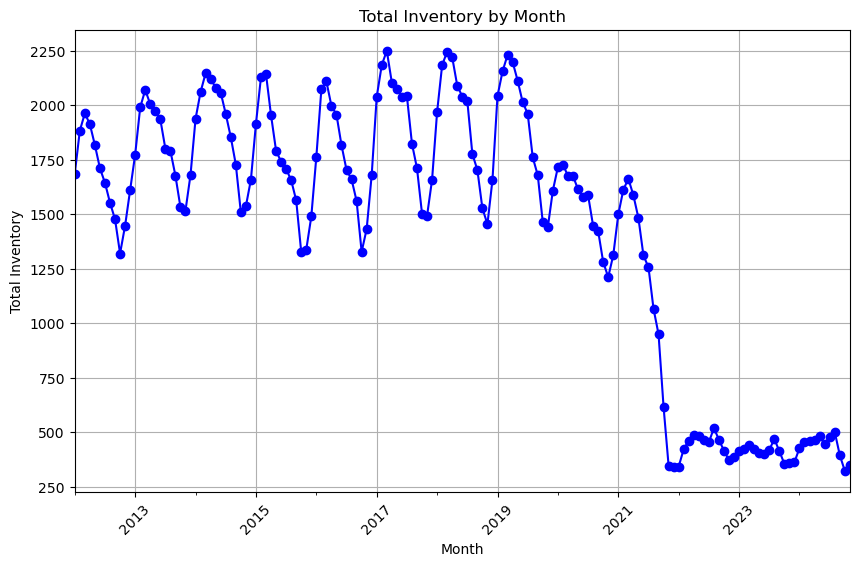

In [6]:
# Group by month and sum the inventory
va_filtered_listings_albemarle['month'] = va_filtered_listings_albemarle['period_begin'].dt.to_period('M')
inventory_monthly = va_filtered_listings_albemarle.groupby('month')['inventory'].sum()

# Plot
plt.figure(figsize=(10, 6))
inventory_monthly.plot(kind='line', marker='o', color='b')
plt.title('Total Inventory by Month')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


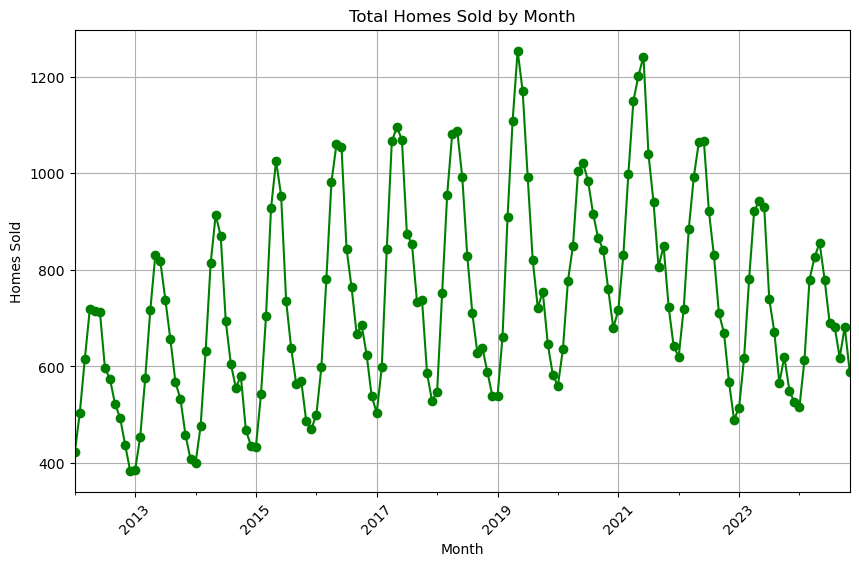

In [7]:
# Group by month and sum the homes sold
homes_sold_monthly = va_filtered_listings_albemarle.groupby('month')['homes_sold'].sum()

# Plot
plt.figure(figsize=(10, 6))
homes_sold_monthly.plot(kind='line', marker='o', color='g')
plt.title('Total Homes Sold by Month')
plt.xlabel('Month')
plt.ylabel('Homes Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


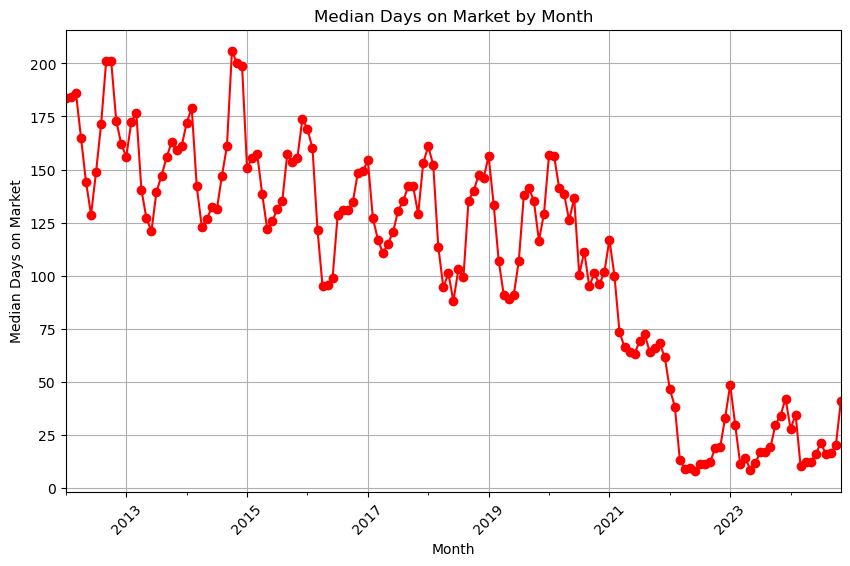

In [8]:
# Group by month and calculate the median days on market
median_dom_monthly = va_filtered_listings_albemarle.groupby('month')['median_dom'].median()

# Plot
plt.figure(figsize=(10, 6))
median_dom_monthly.plot(kind='line', marker='o', color='r')
plt.title('Median Days on Market by Month')
plt.xlabel('Month')
plt.ylabel('Median Days on Market')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


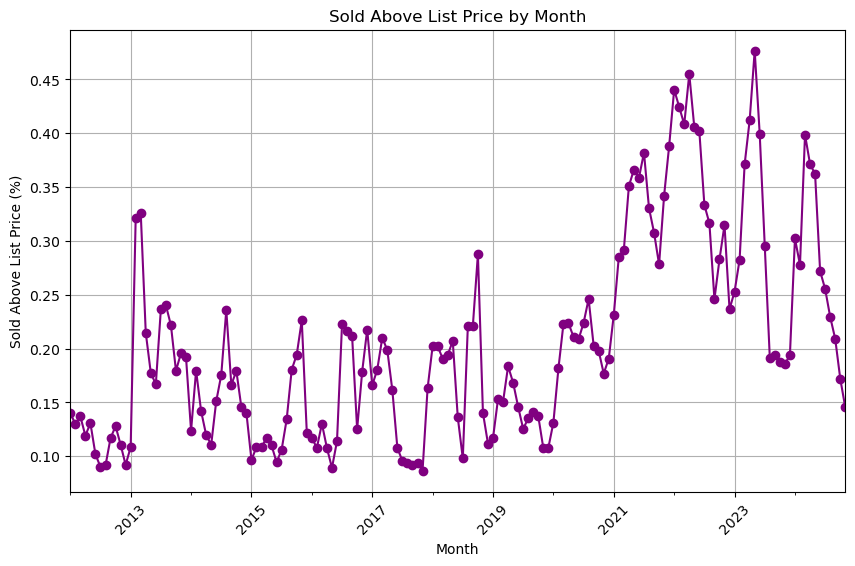

In [9]:
# Group by month and calculate the average sold above list price percentage
sold_above_list_monthly = va_filtered_listings_albemarle.groupby('month')['sold_above_list'].mean()

# Plot
plt.figure(figsize=(10, 6))
sold_above_list_monthly.plot(kind='line', marker='o', color='purple')
plt.title('Sold Above List Price by Month')
plt.xlabel('Month')
plt.ylabel('Sold Above List Price (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


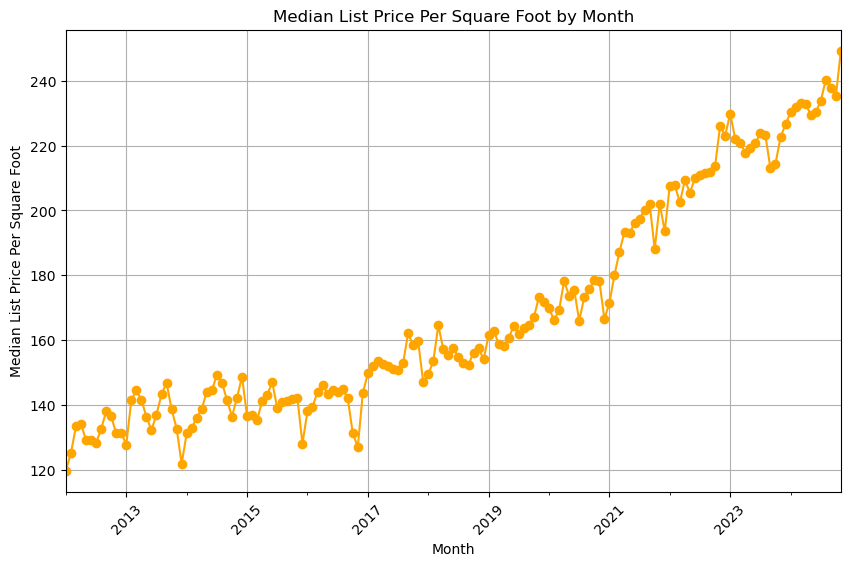

In [10]:
# Group by month and calculate the median list price per square foot
median_ppsf_monthly = va_filtered_listings_albemarle.groupby('month')['median_ppsf'].median()

# Plot
plt.figure(figsize=(10, 6))
median_ppsf_monthly.plot(kind='line', marker='o', color='orange')
plt.title('Median List Price Per Square Foot by Month')
plt.xlabel('Month')
plt.ylabel('Median List Price Per Square Foot')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


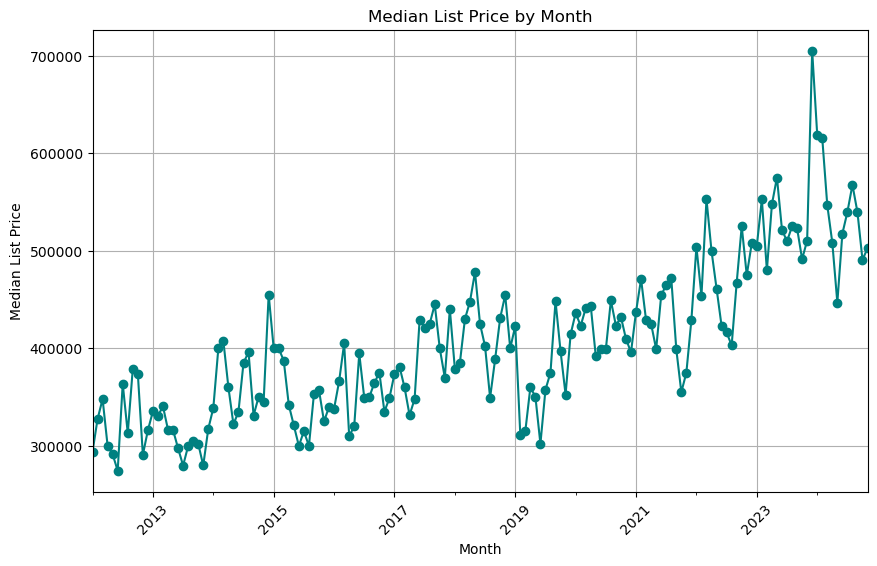

In [11]:
# Group by month and calculate the median list price
median_list_price_monthly = va_filtered_listings_albemarle.groupby('month')['median_list_price'].median()

# Plot
plt.figure(figsize=(10, 6))
median_list_price_monthly.plot(kind='line', marker='o', color='teal')
plt.title('Median List Price by Month')
plt.xlabel('Month')
plt.ylabel('Median List Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


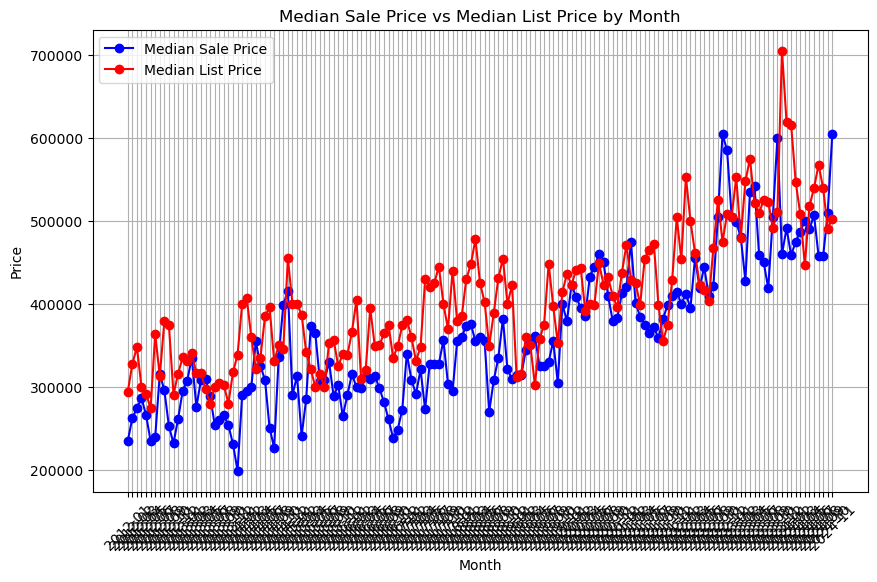

In [12]:
# Group by month and calculate the median sale price and list price
median_prices_monthly = va_filtered_listings_albemarle.groupby('month')[['median_sale_price', 'median_list_price']].median()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_sale_price'], label='Median Sale Price', marker='o', color='b')
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_list_price'], label='Median List Price', marker='o', color='r')
plt.title('Median Sale Price vs Median List Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


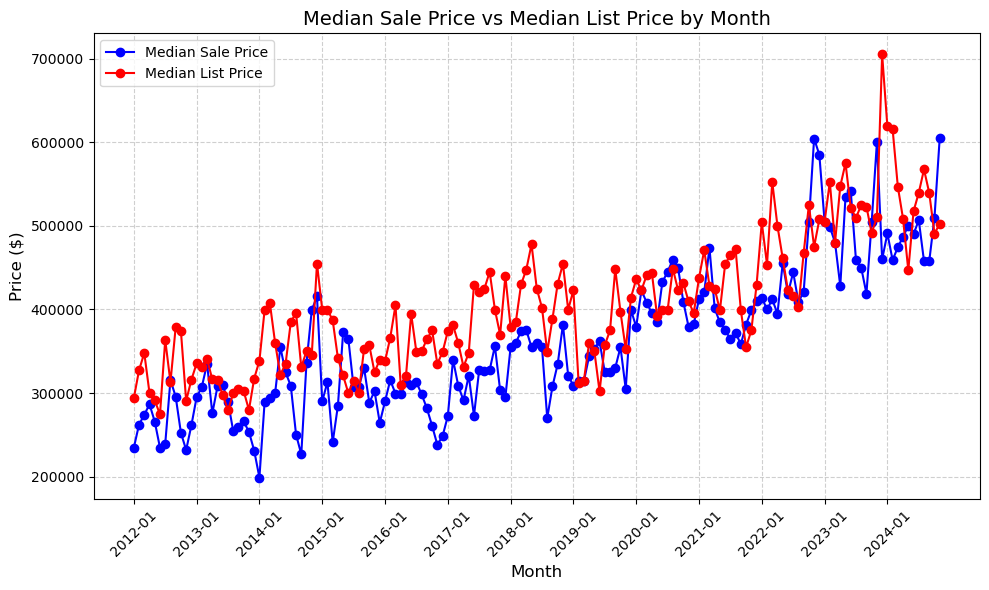

In [16]:
# Group by month and calculate the median sale price and list price
median_prices_monthly = va_filtered_listings_albemarle.groupby('month')[['median_sale_price', 'median_list_price']].median()

# Plot
plt.figure(figsize=(10, 6))

# Plot Median Sale Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_sale_price'], label='Median Sale Price', marker='o', color='b')

# Plot Median List Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_list_price'], label='Median List Price', marker='o', color='r')

# Add titles and labels
plt.title('Median Sale Price vs Median List Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(median_prices_monthly), 12), labels=median_prices_monthly.index.astype(str)[::12])

# Show legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


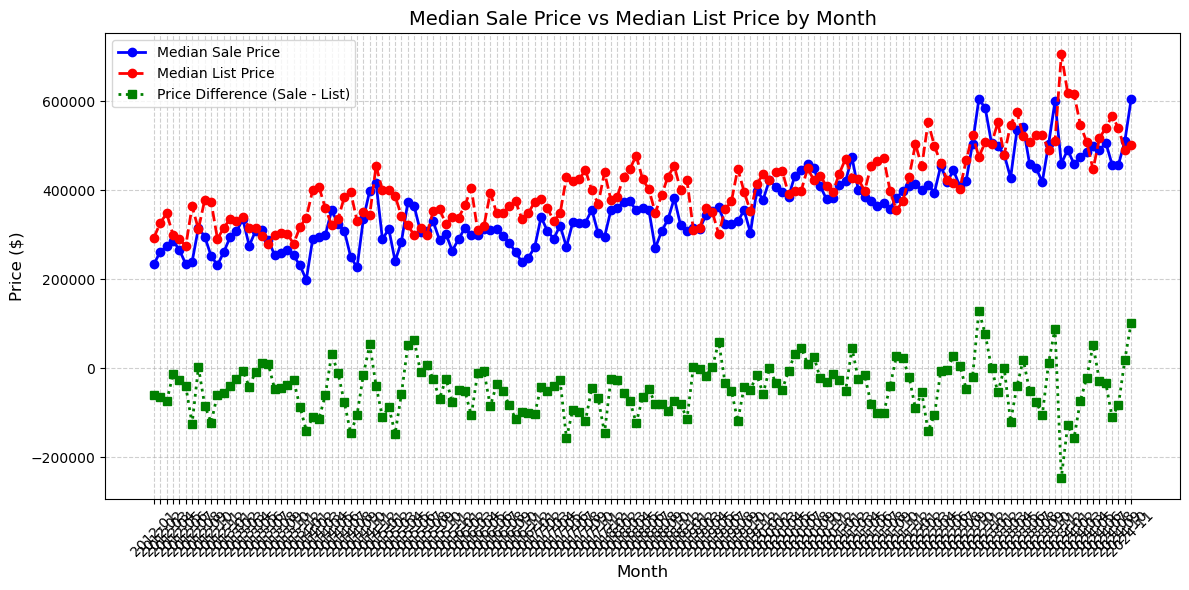

In [14]:
# Group by month and calculate the median sale price and list price
median_prices_monthly = va_filtered_listings_albemarle.groupby('month')[['median_sale_price', 'median_list_price']].median()

# Create a new column for the price difference between sale and list price
median_prices_monthly['price_diff'] = median_prices_monthly['median_sale_price'] - median_prices_monthly['median_list_price']

# Plot
plt.figure(figsize=(12, 6))

# Plot Median Sale Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_sale_price'], label='Median Sale Price', marker='o', color='b', linestyle='-', linewidth=2)

# Plot Median List Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_list_price'], label='Median List Price', marker='o', color='r', linestyle='--', linewidth=2)

# Plot Price Difference
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['price_diff'], label='Price Difference (Sale - List)', marker='s', color='g', linestyle=':', linewidth=2)

# Add titles and labels
plt.title('Median Sale Price vs Median List Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


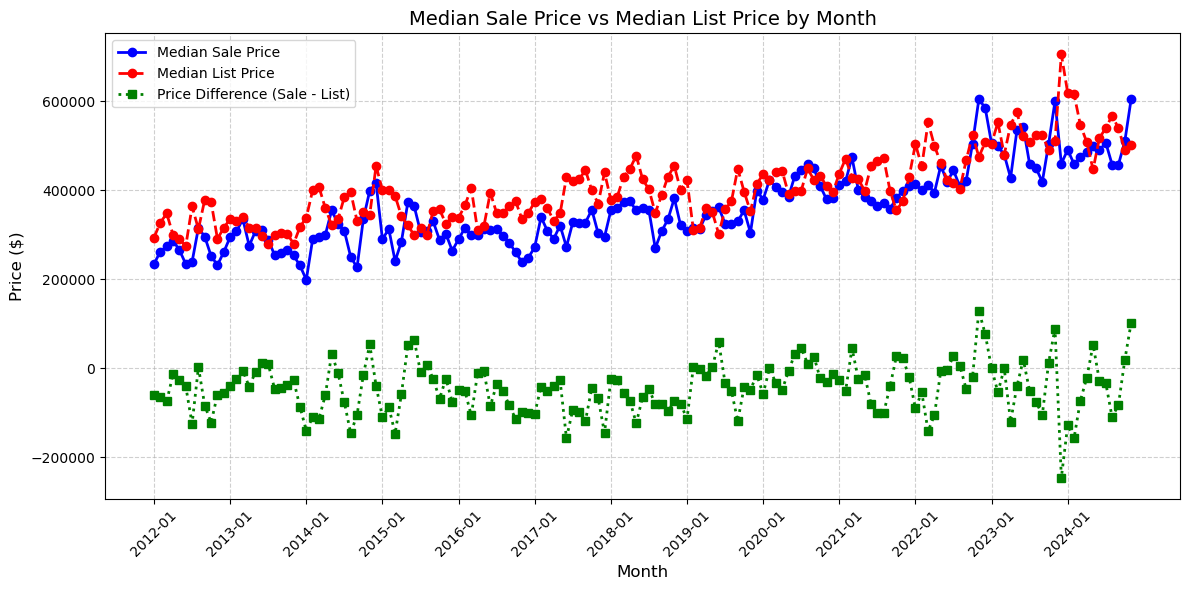

In [15]:
# Group by month and calculate the median sale price and list price
median_prices_monthly = va_filtered_listings_albemarle.groupby('month')[['median_sale_price', 'median_list_price']].median()

# Create a new column for the price difference between sale and list price
median_prices_monthly['price_diff'] = median_prices_monthly['median_sale_price'] - median_prices_monthly['median_list_price']

# Plot
plt.figure(figsize=(12, 6))

# Plot Median Sale Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_sale_price'], label='Median Sale Price', marker='o', color='b', linestyle='-', linewidth=2)

# Plot Median List Price
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_list_price'], label='Median List Price', marker='o', color='r', linestyle='--', linewidth=2)

# Plot Price Difference
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['price_diff'], label='Price Difference (Sale - List)', marker='s', color='g', linestyle=':', linewidth=2)

# Add titles and labels
plt.title('Median Sale Price vs Median List Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(median_prices_monthly), 12), labels=median_prices_monthly.index.astype(str)[::12])

# Show legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


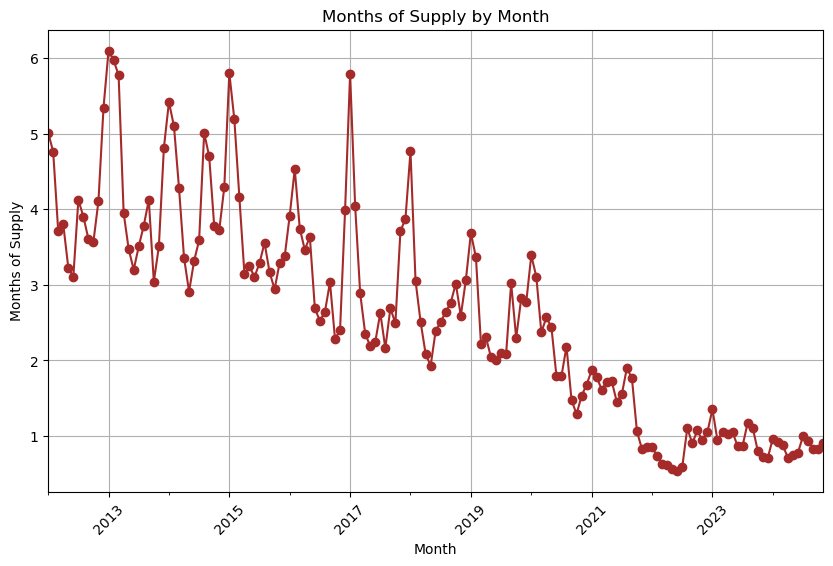

In [13]:
# Group by month and calculate months of supply (inventory / homes sold)
va_filtered_listings_albemarle['months_of_supply'] = va_filtered_listings_albemarle['inventory'] / va_filtered_listings_albemarle['homes_sold']
months_of_supply_monthly = va_filtered_listings_albemarle.groupby('month')['months_of_supply'].mean()

# Plot
plt.figure(figsize=(10, 6))
months_of_supply_monthly.plot(kind='line', marker='o', color='brown')
plt.title('Months of Supply by Month')
plt.xlabel('Month')
plt.ylabel('Months of Supply')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


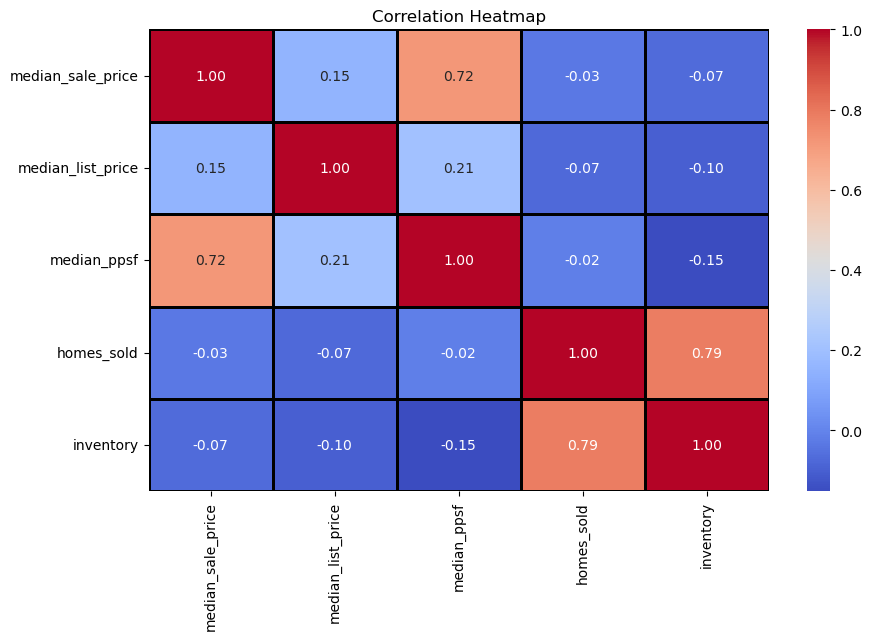

In [17]:
# Compute the correlation matrix
correlation_matrix = va_filtered_listings_albemarle[['median_sale_price', 'median_list_price', 'median_ppsf', 'homes_sold', 'inventory']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()


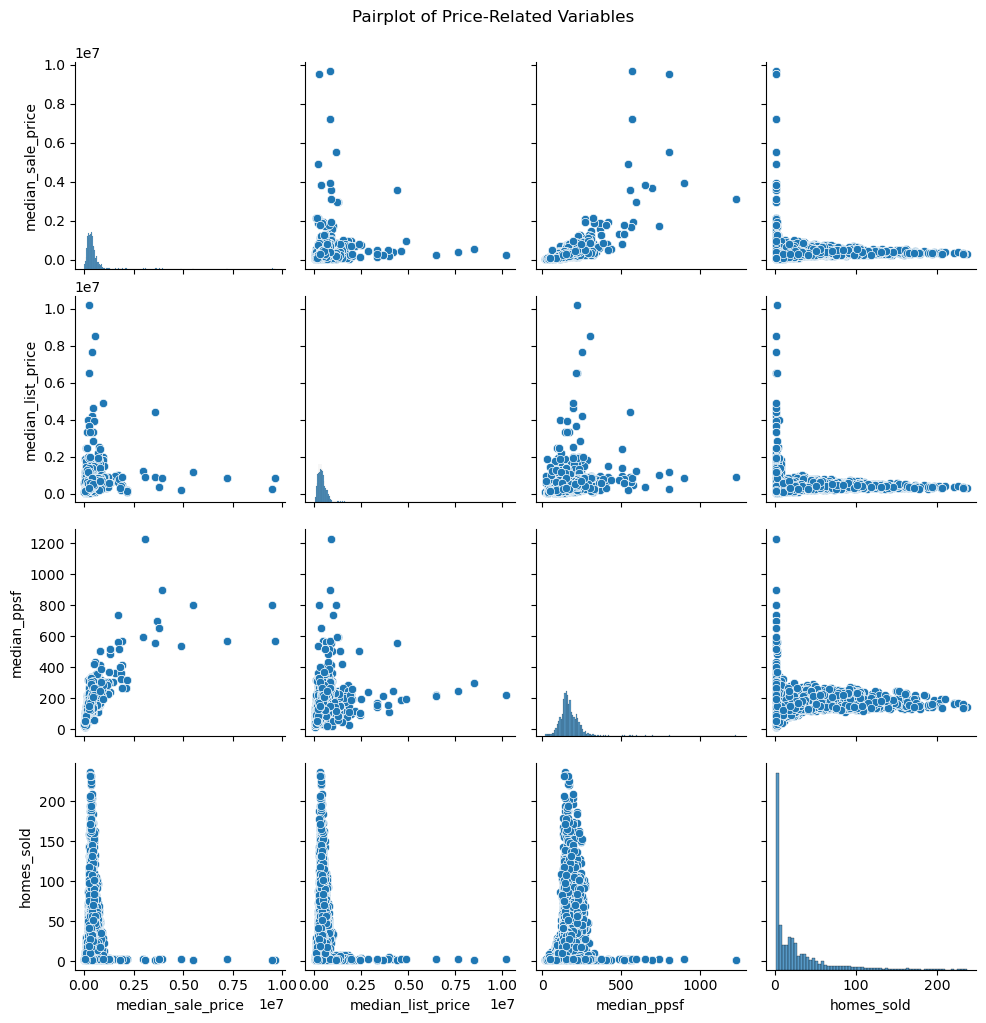

In [18]:
sns.pairplot(va_filtered_listings_albemarle[['median_sale_price', 'median_list_price', 'median_ppsf', 'homes_sold']])
plt.suptitle('Pairplot of Price-Related Variables', y=1.02)
plt.show()

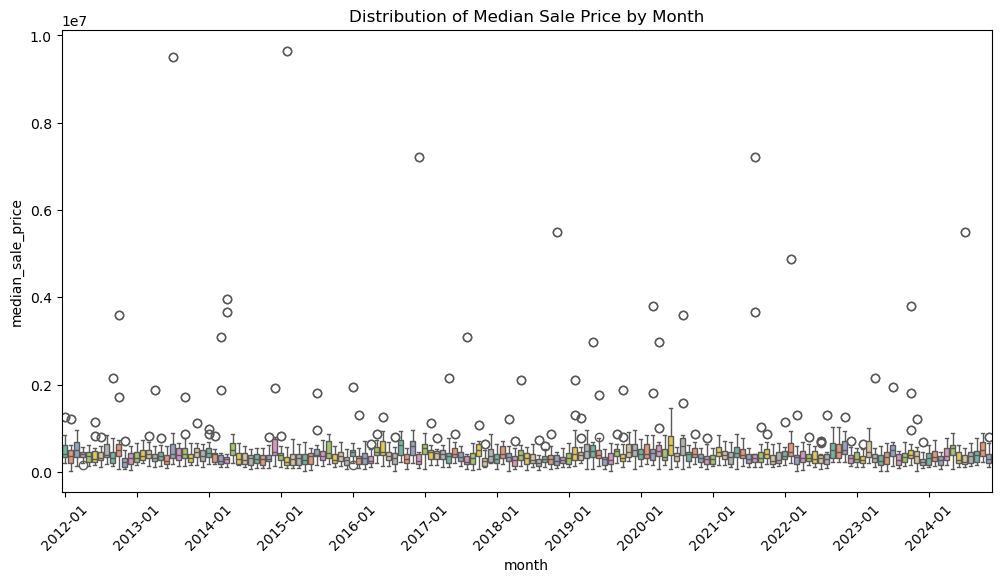

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot for Median Sale Price by Month with hue as 'month'
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='median_sale_price', data=va_filtered_listings_albemarle, hue='month', palette='Set2')

# Add title and labels
plt.title('Distribution of Median Sale Price by Month')
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(va_filtered_listings_albemarle['month'].unique()), 12),
           labels=sorted(va_filtered_listings_albemarle['month'].unique())[::12])

# Display the plot
plt.show()


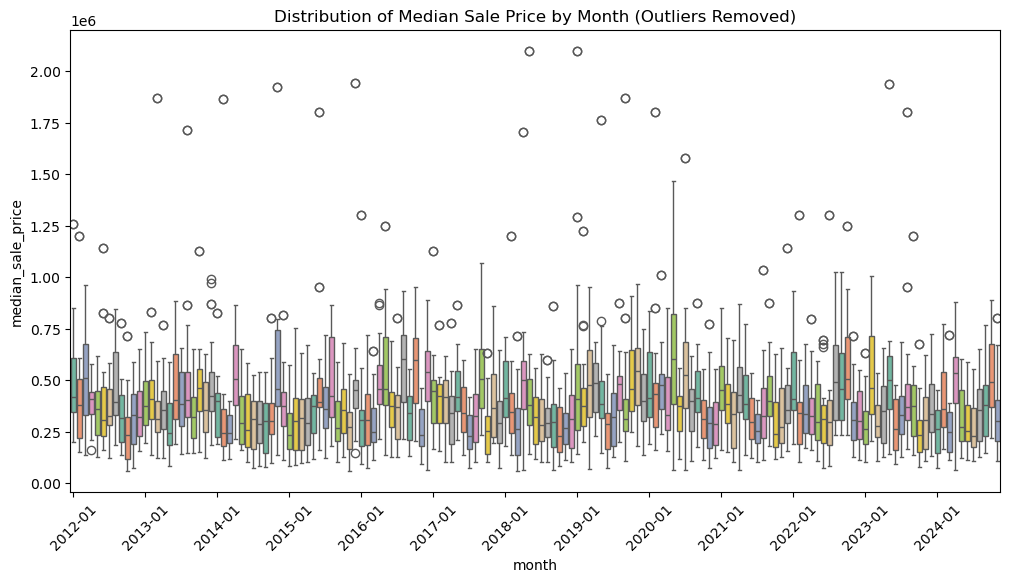

In [37]:
# Calculate the 1st and 99th percentiles for median_sale_price
sale_price_lower = va_filtered_listings_albemarle['median_sale_price'].quantile(0.01)
sale_price_upper = va_filtered_listings_albemarle['median_sale_price'].quantile(0.99)

# Filter the data to exclude outliers
filtered_data = va_filtered_listings_albemarle[
    (va_filtered_listings_albemarle['median_sale_price'] >= sale_price_lower) & 
    (va_filtered_listings_albemarle['median_sale_price'] <= sale_price_upper)
]

# Create the boxplot for Median Sale Price by Month with hue as 'month'
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='median_sale_price', data=filtered_data, hue='month', palette='Set2')

# Add title and labels
plt.title('Distribution of Median Sale Price by Month (Outliers Removed)')
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(filtered_data['month'].unique()), 12),
           labels=sorted(filtered_data['month'].unique())[::12])

# Display the plot
plt.show()


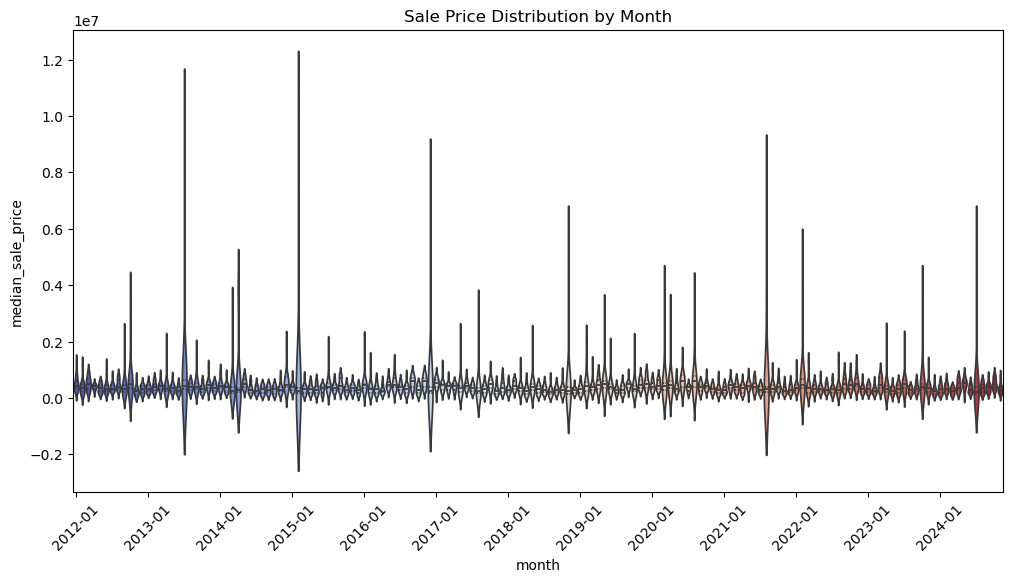

In [28]:
# Create the violin plot for Sale Price Distribution by Month with hue as 'month'
plt.figure(figsize=(12, 6))
sns.violinplot(x='month', y='median_sale_price', data=va_filtered_listings_albemarle, inner='quart', hue='month', palette='coolwarm')

# Add title and labels
plt.title('Sale Price Distribution by Month')
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(va_filtered_listings_albemarle['month'].unique()), 12),
           labels=sorted(va_filtered_listings_albemarle['month'].unique())[::12])

# Display the plot
plt.show()


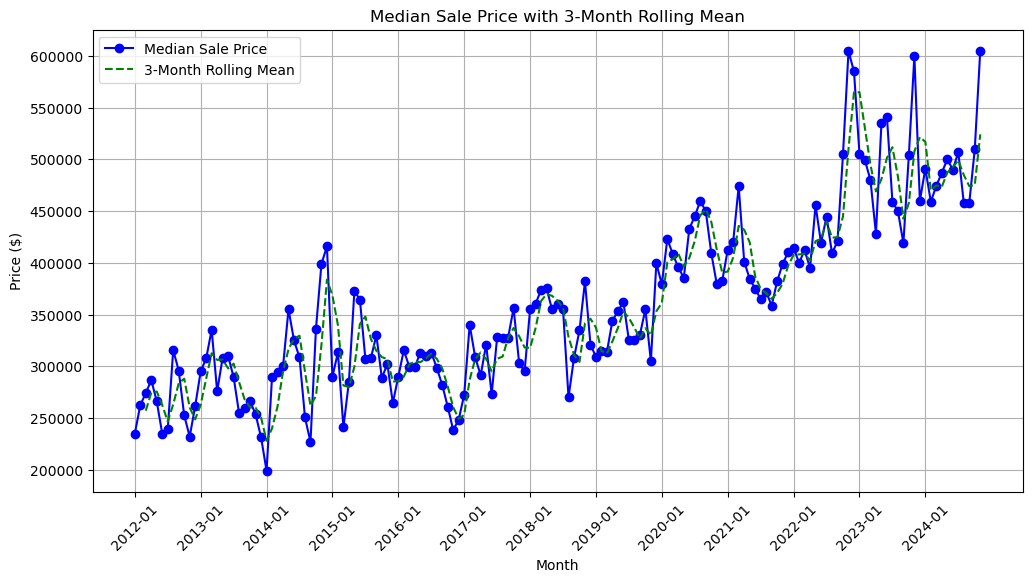

In [30]:
# First, we group by month and calculate the median sale price for each month
va_filtered_listings_albemarle['month'] = va_filtered_listings_albemarle['period_begin'].dt.to_period('M')
monthly_data = va_filtered_listings_albemarle.groupby('month')['median_sale_price'].median()

# Now calculate the 3-month rolling mean on the monthly data
monthly_data_rolling = monthly_data.rolling(window=3).mean()

# Plot the median sale price and the 3-month rolling mean
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index.astype(str), monthly_data, label='Median Sale Price', marker='o', color='b')
plt.plot(monthly_data.index.astype(str), monthly_data_rolling, label='3-Month Rolling Mean', color='g', linestyle='--')

# Title and labels
plt.title('Median Sale Price with 3-Month Rolling Mean')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(monthly_data), 12),
           labels=[str(month) for month in monthly_data.index[::12]])

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

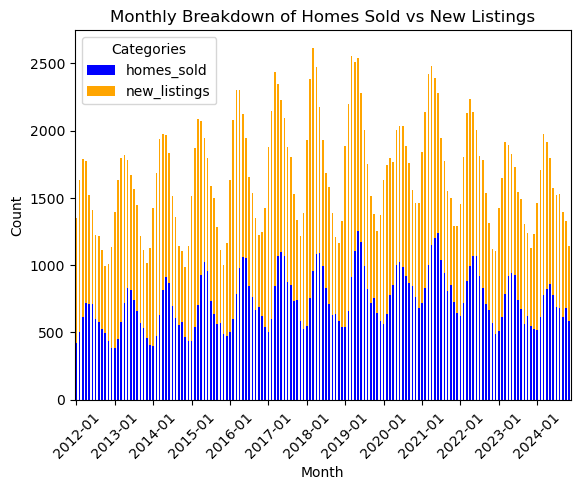

In [31]:
# Group by month and sum homes sold and new listings
monthly_stats = va_filtered_listings_albemarle.groupby('month')[['homes_sold', 'new_listings']].sum()

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
monthly_stats.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Add title and labels
plt.title('Monthly Breakdown of Homes Sold vs New Listings')
plt.xlabel('Month')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(monthly_stats), 12),
           labels=[str(month) for month in monthly_stats.index[::12]])

# Display the legend
plt.legend(title='Categories')

# Show the plot
plt.show()


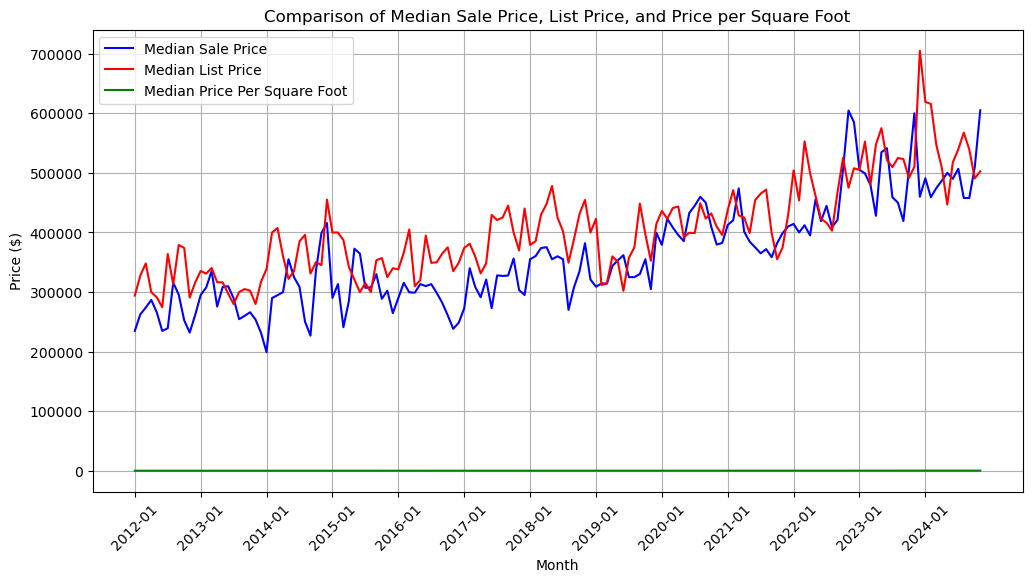

In [33]:
# Group by month and calculate the median for the relevant columns (median_sale_price, median_list_price, and median_ppsf)
median_prices_monthly = va_filtered_listings_albemarle.groupby('month')[['median_sale_price', 'median_list_price', 'median_ppsf']].median()

# Plot the comparison of all three metrics: median sale price, list price, and price per square foot
plt.figure(figsize=(12, 6))
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_sale_price'], label='Median Sale Price', color='b')
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_list_price'], label='Median List Price', color='r')
plt.plot(median_prices_monthly.index.astype(str), median_prices_monthly['median_ppsf'], label='Median Price Per Square Foot', color='g')
plt.title('Comparison of Median Sale Price, List Price, and Price per Square Foot')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)

# Show only every 12th month on the x-axis
plt.xticks(ticks=range(0, len(median_prices_monthly), 12),
           labels=[str(month) for month in median_prices_monthly.index[::12]])

plt.legend()
plt.grid(True)
plt.show()


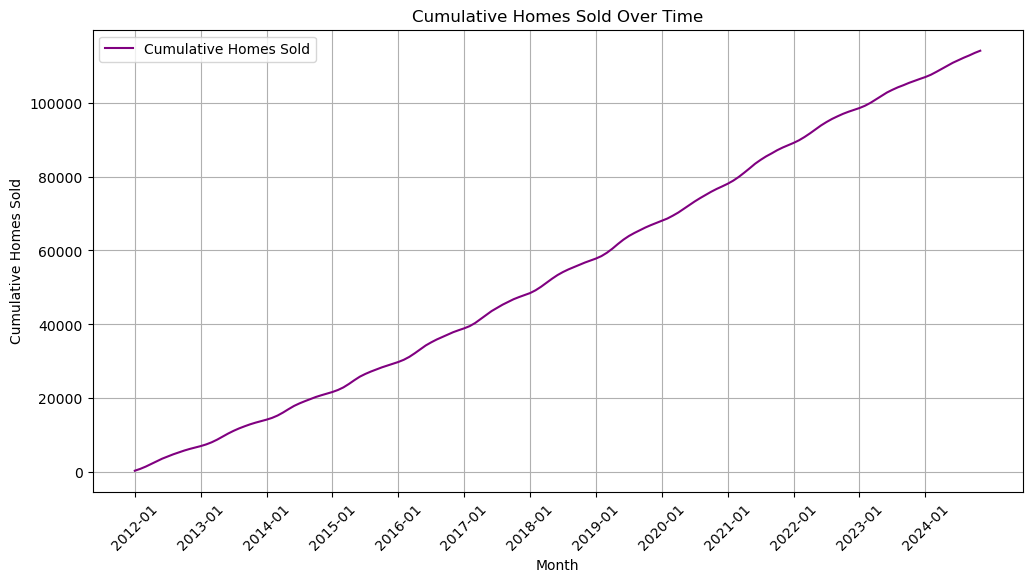

In [35]:
# Group by month and calculate cumulative sum of homes sold
homes_sold_monthly = va_filtered_listings_albemarle.groupby('month')['homes_sold'].sum()
homes_sold_monthly_cumsum = homes_sold_monthly.cumsum()

# Plot the cumulative sales over time
plt.figure(figsize=(12, 6))
plt.plot(homes_sold_monthly.index.astype(str), homes_sold_monthly_cumsum, label='Cumulative Homes Sold', color='purple')
plt.title('Cumulative Homes Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Cumulative Homes Sold')

# Rotate x-axis labels and show only every 12th month on the x-axis
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, len(homes_sold_monthly), 12),
           labels=[str(month) for month in homes_sold_monthly.index[::12]])

plt.legend()
plt.grid(True)
plt.show()


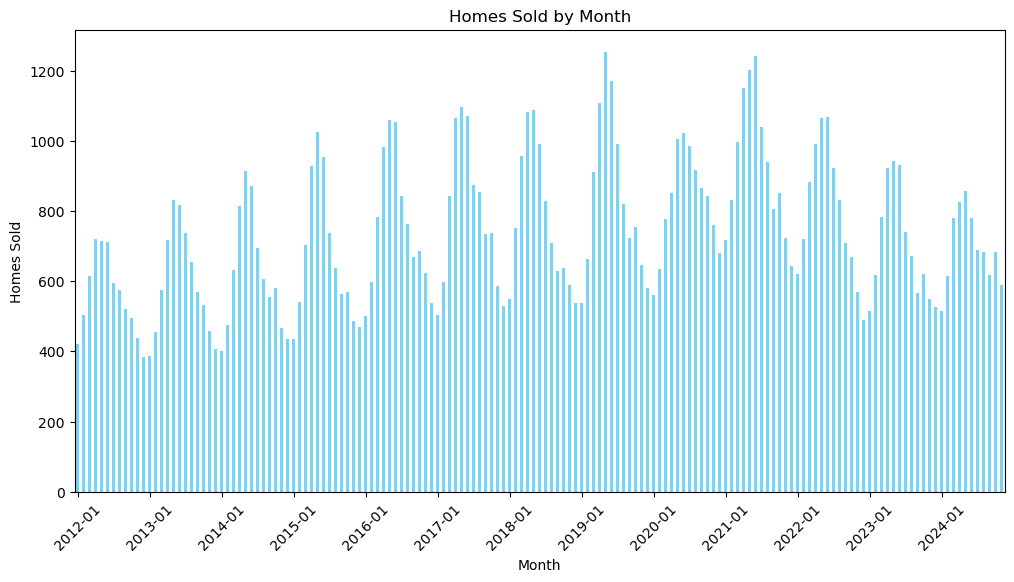

In [34]:
# Group by month and sum the homes sold
homes_sold_monthly = va_filtered_listings_albemarle.groupby('month')['homes_sold'].sum()

# Plot bar chart
plt.figure(figsize=(12, 6))
homes_sold_monthly.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Homes Sold by Month')
plt.xlabel('Month')
plt.ylabel('Homes Sold')

# Rotate x-axis labels and show only every 12th month on the x-axis
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, len(homes_sold_monthly), 12),
           labels=[str(month) for month in homes_sold_monthly.index[::12]])

# Show the plot
plt.show()


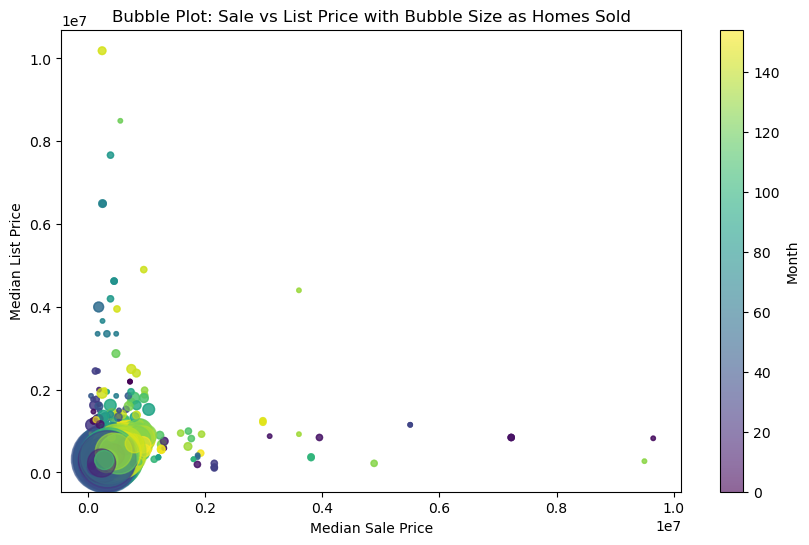

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(va_filtered_listings_albemarle['median_sale_price'], va_filtered_listings_albemarle['median_list_price'],
            s=va_filtered_listings_albemarle['homes_sold'] * 10, c=va_filtered_listings_albemarle['month'].astype('category').cat.codes, cmap='viridis', alpha=0.6)
plt.title('Bubble Plot: Sale vs List Price with Bubble Size as Homes Sold')
plt.xlabel('Median Sale Price')
plt.ylabel('Median List Price')
plt.colorbar(label='Month')
plt.show()


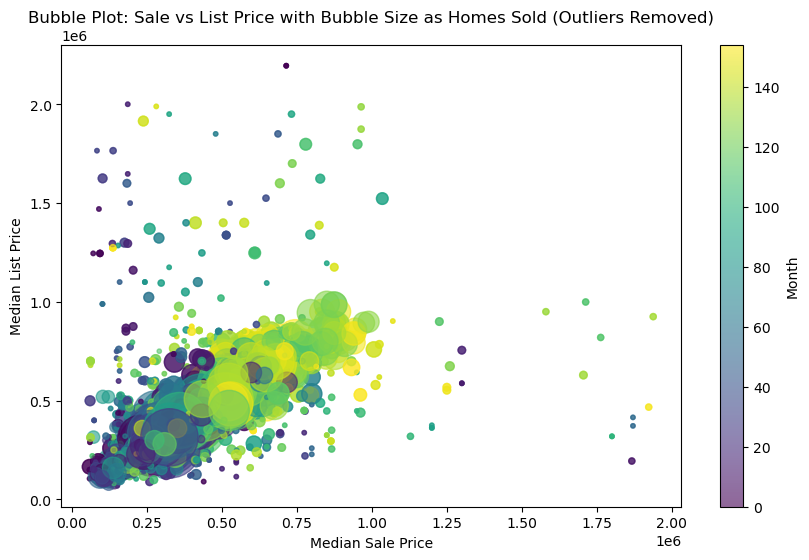

In [36]:
# Calculate the 1st and 99th percentiles for both sale and list price
sale_price_lower = va_filtered_listings_albemarle['median_sale_price'].quantile(0.01)
sale_price_upper = va_filtered_listings_albemarle['median_sale_price'].quantile(0.99)
list_price_lower = va_filtered_listings_albemarle['median_list_price'].quantile(0.01)
list_price_upper = va_filtered_listings_albemarle['median_list_price'].quantile(0.99)

# Filter the data to exclude outliers
filtered_data = va_filtered_listings_albemarle[
    (va_filtered_listings_albemarle['median_sale_price'] >= sale_price_lower) & 
    (va_filtered_listings_albemarle['median_sale_price'] <= sale_price_upper) &
    (va_filtered_listings_albemarle['median_list_price'] >= list_price_lower) & 
    (va_filtered_listings_albemarle['median_list_price'] <= list_price_upper)
]

# Plot the bubble plot without outliers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['median_sale_price'], filtered_data['median_list_price'],
            s=filtered_data['homes_sold'] * 10, c=filtered_data['month'].astype('category').cat.codes, cmap='viridis', alpha=0.6)
plt.title('Bubble Plot: Sale vs List Price with Bubble Size as Homes Sold (Outliers Removed)')
plt.xlabel('Median Sale Price')
plt.ylabel('Median List Price')
plt.colorbar(label='Month')
plt.show()
